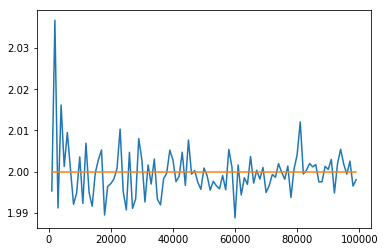

In [119]:
# Example numerical intergrtion of Integral[0:pi][sin x]dx can be represented as pi* Integral[0:pi](1/pi)* sinx dx
# The above expression is pi*E(sin(X)) which can be approximated with pi*1/n(sum[0:n]sin(Xi))
# The above makes use of the Central Limit Theorem ..Xi are uniform between 0->pi, or between [a,b] for integral

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import uniform

# expected solution is 
actual = 2

uniform_arr = uniform.rvs(size = 10) * math.pi

# n i the number of simulation 

def monte_carlo_sin_x(n):   
    uniform_arr = uniform.rvs(size = n) * math.pi
    estimates   = np.sin(uniform_arr) * math.pi
    estimate    = np.mean(estimates)
    return (estimates,estimate)


# how result improves with larger n 

y = []
x       = range(1000,100000,1000)
for i in x:
    y.append(monte_carlo_sin_x(i)[1])
    

plt.plot(x, y)
plt.plot(x,[2]*len(x))
plt.plot
plt.show() # approaches actual value 2


In [133]:
# Standard deviation of the estimate is stdev = (1/n-1)* sum(math.pi*math.sin(Xi) - )**2
n = 10000
simulation = monte_carlo_sin_x(n)
estimates  = simulation[0]
estimate   = simulation[1]     

standard_dev_1  = (1/(n-1)) * np.sum((estimates-estimate)**2)
standard_dev_2  = np.std(estimates)
standard_dev_1
standard_dev_2

#Confidence Intervals #99.7%
C_I = [estimate-3*standard_dev_1/math.sqrt(n),estimate+3*standard_dev_1/math.sqrt(n)]
C_I



[1.9880711910912716, 2.0432429710937963]

In [ ]:
# Central limit theorem as n becomes large estimate ~ N(u, _sigma/n) convergence

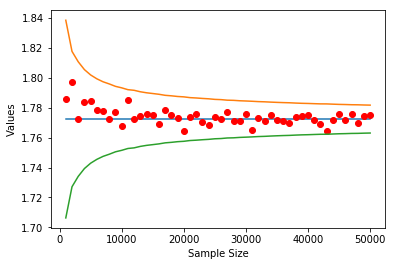

In [70]:
# Estimating integral of [−∞:∞]∫ 𝑒−𝑥2 𝑑𝑥
import numpy as np
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(0)

estimate = [None]*50
std      = [None]*50
actual   = [np.sqrt(np.pi)]*50
samples  = [i*1000 for i in range(1,51)]

for i in range(1,51):
    norm_array = norm.rvs(size=i*1000)
    estimates  = np.exp(-norm_array**2/2)*np.sqrt(2*np.pi)
    estimate[i-1]   = np.mean(estimates)
    std[i-1]        = np.std(estimates) / np.sqrt(i*1000)
    
upper_CI   = [actual[i] + 3*std[i] for i in range(50)]
lower_CI   = [actual[i] - 3*std[i] for i in range(50)]
# Plotting the results
plt.plot(samples,actual)
plt.plot(samples,estimate,'ro')
plt.plot(samples,upper_CI)
plt.plot(samples,lower_CI)
plt.xlabel("Sample Size")
plt.ylabel("Values")
plt.show()